In [16]:
import pandas as pd

# Data Collection

In [17]:
import requests

# URLs of the files
train_data_url = 'https://www.raphaelcousin.com/modules/module3/exercise/module3_exercise_train.csv'
test_data_url = 'https://www.raphaelcousin.com/modules/module3/exercise/module3_exercise_test.csv'

# Function to download a file
def download_file(url, file_name):
    response = requests.get(url)
    response.raise_for_status()  # Ensure we notice bad responses
    with open(file_name, 'wb') as file:
        file.write(response.content)
    print(f'Downloaded {file_name} from {url}')

# Downloading the files
download_file(train_data_url, 'module3_exercise_train.csv')
download_file(test_data_url, 'module3_exercise_test.csv')

Downloaded module3_exercise_train.csv from https://www.raphaelcousin.com/modules/module3/exercise/module3_exercise_train.csv
Downloaded module3_exercise_test.csv from https://www.raphaelcousin.com/modules/module3/exercise/module3_exercise_test.csv


In [18]:
df_train =  pd.read_csv("module3_exercise_train.csv", sep=",", index_col='id')

# Data Analysis

In [19]:
import matplotlib.pyplot as plt

## Premier coup d'oeil

In [20]:
df_train.sample(10)

,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
id,,,,,,,,,,,,,,,,,
238,3,1,7.0,2,1978.0,two,500,349,0,0,0,0,0,0,2,2010.0,210000
1050,4,1,7.0,2,1935.0,two,540,0,0,0,0,90,0,0,7,2008.0,235000
1424,3,1,5.0,2,1953.0,two,495,0,0,0,0,287,0,0,6,2008.0,155000
287,3,1,7.0,0,2005.0,two,528,0,46,0,0,0,0,800,8,2009.0,110000
114,3,1,6.0,1,1991.0,two,884,0,0,252,0,0,0,0,5,2009.0,176000
665,3,1,7.0,1,1940.0,one,240,335,0,0,0,0,0,0,7,2009.0,139500
978,2,1,7.0,1,2008.0,three,774,0,66,0,304,0,0,0,11,2008.0,394617
859,4,1,8.0,1,1994.0,three,711,517,76,0,0,0,0,0,7,2009.0,402000
830,3,1,8.0,1,2005.0,three,878,192,52,0,0,0,0,0,3,2006.0,275500


In [21]:
print("Shape:")
df_train.shape

Shape:


(1168, 17)

Le jeu de données contient 1168 variables possédant chacune 17 features.

In [22]:
print("Summary:")
df_train.info()

Summary:
<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 254 to 1126
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BedroomAbvGr   1168 non-null   int64  
 1   KitchenAbvGr   1168 non-null   int64  
 2   TotRmsAbvGrd   1167 non-null   float64
 3   Fireplaces     1168 non-null   int64  
 4   GarageYrBlt    1168 non-null   float64
 5   GarageCars     1167 non-null   object 
 6   GarageArea     1168 non-null   int64  
 7   WoodDeckSF     1168 non-null   int64  
 8   OpenPorchSF    1168 non-null   int64  
 9   EnclosedPorch  1168 non-null   int64  
 10  3SsnPorch      1168 non-null   int64  
 11  ScreenPorch    1168 non-null   int64  
 12  PoolArea       1168 non-null   int64  
 13  MiscVal        1168 non-null   int64  
 14  MoSold         1168 non-null   int64  
 15  YrSold         1167 non-null   float64
 16  SalePrice      1168 non-null   int64  
dtypes: float64(3), int64(13), object(1)
memory usa

Une valeur non numérique, à supprimer lors des tests numériques avec :

```
.drop(labels=['GarageCars'], axis=1)
```



In [23]:
df_train[df_train.isnull().any(axis=1)]

,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
id,,,,,,,,,,,,,,,,,
1189,3,1,6.0,0,1966.0,NaN,408,0,0,0,0,0,0,0,12,2008.0,109900
135,2,1,6.0,0,1981.0,one,308,0,176,0,0,0,0,0,6,NaN,120000
321,2,1,NaN,1,1948.0,one,240,0,130,0,0,0,0,0,11,2007.0,119200


Il y a 3 valeurs manquantes dans ces datas.

In [26]:
print("\nDuplicate rows:")
df_train[df_train.duplicated(keep=False)].sort_values(by=df_train.columns.tolist())


Duplicate rows:


,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
id,,,,,,,,,,,,,,,,,
1057,3,1,7.0,0,2004.0,two,380,0,40,0,0,0,0,0,4,2006.0,130000
1389,3,1,7.0,0,2004.0,two,380,0,40,0,0,0,0,0,4,2006.0,130000


Une seule ligne dédoublée

## Visualisation

In [24]:
print("\nSummary Statistics:")
print(f"Number different values per column\n{df_train.nunique()}")
df_train.describe()


Summary Statistics:
Number different values per column
BedroomAbvGr       8
KitchenAbvGr       3
TotRmsAbvGrd      12
Fireplaces         4
GarageYrBlt       98
GarageCars         5
GarageArea       387
WoodDeckSF       242
OpenPorchSF      184
EnclosedPorch    105
3SsnPorch         15
ScreenPorch       66
PoolArea           6
MiscVal           19
MoSold            12
YrSold             5
SalePrice        571
dtype: int64


,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,1167.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1167.000000,1168.000000
mean,2.872432,1.043664,6.497858,0.607877,1867.833904,469.120719,91.976027,46.300514,23.607021,2.782534,15.701199,2.378425,39.720890,6.336473,2007.802057,179163.845890
std,0.805929,0.212653,1.618330,0.630833,454.504382,210.626791,123.448275,67.180017,62.307174,23.908902,57.516696,36.477960,489.113625,2.692267,1.327656,76848.682649
min,0.000000,1.000000,2.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,2.000000,1.000000,5.000000,0.000000,1957.000000,324.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,3.000000,1.000000,6.000000,1.000000,1977.000000,478.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,161625.000000
75%,3.000000,1.000000,7.000000,1.000000,2000.000000,576.000000,168.000000,66.250000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,212250.000000
max,8.000000,3.000000,14.000000,3.000000,2010.000000,1418.000000,736.000000,547.000000,386.000000,320.000000,480.000000,648.000000,15500.000000,12.000000,2010.000000,745000.000000



Histograms of numerical features:


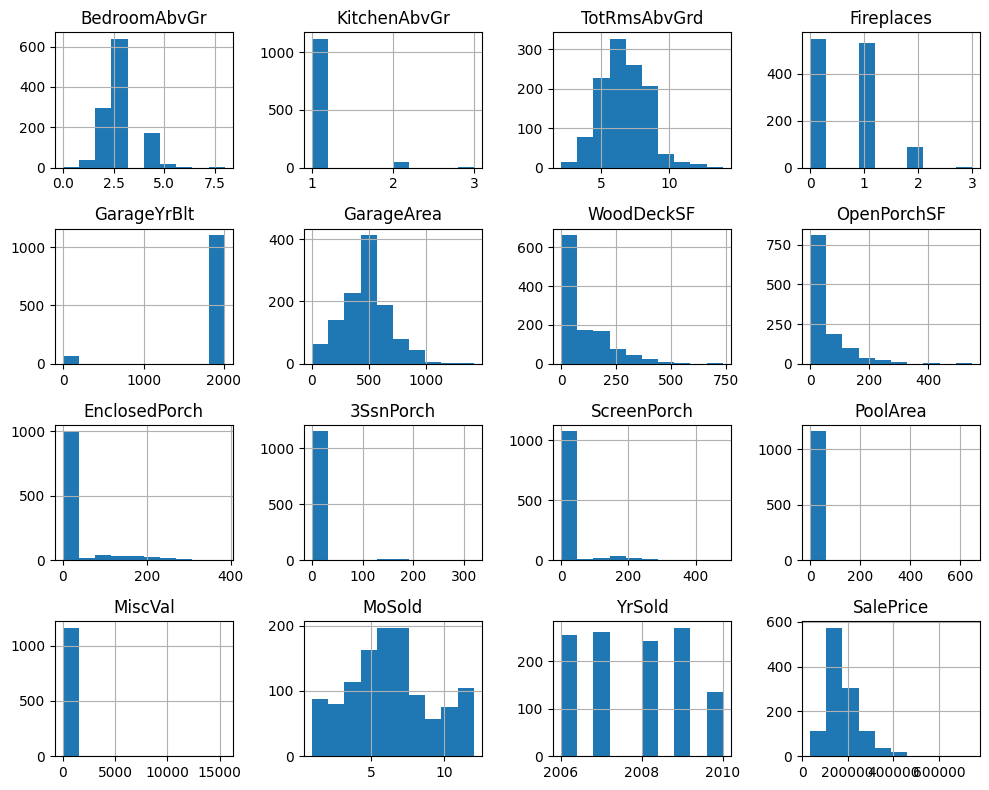

In [27]:
print("\nHistograms of numerical features:")
df_train.hist(figsize=(10, 8))
plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

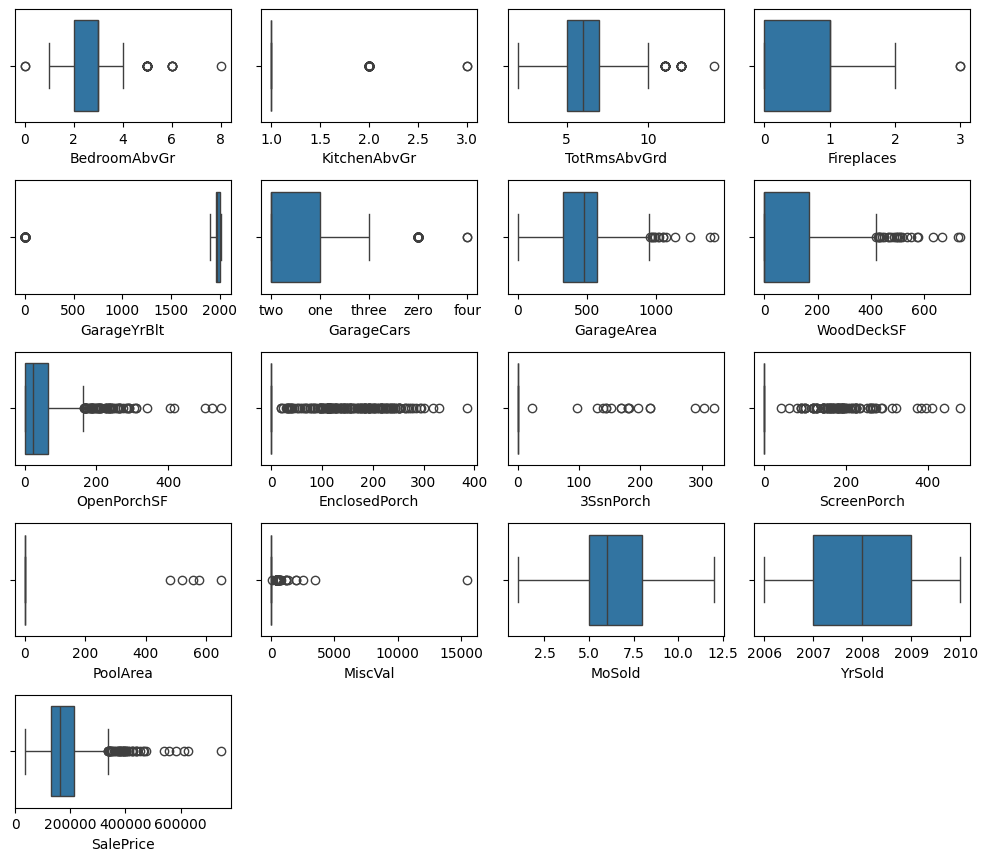

In [34]:
import seaborn as sns

plt.figure(figsize=(10, 10))

for i in range(df_train.shape[1]):
    plt.subplot(6, 4, i + 1)
    sns.boxplot(x=df_train.iloc[:, i])
plt.tight_layout()
plt.show()

Pour certaines caractéristiques, on constate beaucoup d'outliers parfois très éloignés des quartiles. On peut l'interpeter par le fait qu'une majorité des ménages fait partie de la classe moyenne, ainsi les ménages plus aisés sont des anomalies dans l'analyse purement statistique de ce tableau (variable EnclosedPorch).

Cela peut aussi être dû à la manière de gérer les données manquantes, car il semble improbable que la variable GarageYrBlt (représentant une année) puisse prendre la valeur 0.

## Corrélation


Correlation matrix:


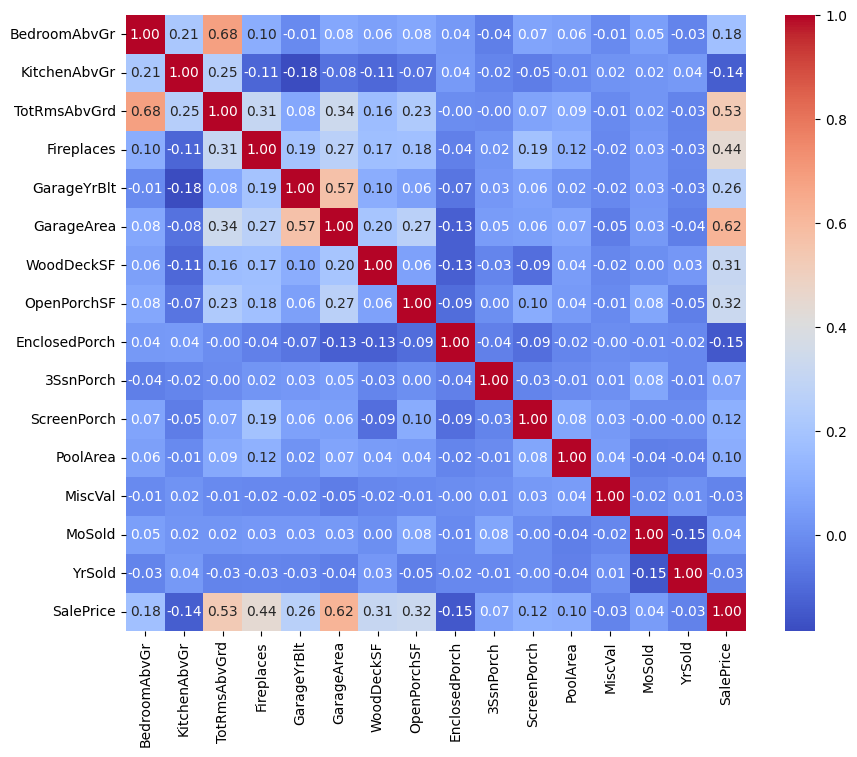

In [35]:
print("\nCorrelation matrix:")
corr_matrix = df_train.drop(labels=['GarageCars'], axis=1).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

De manière évidente, on trouve une forte corrélation entre les deux features liées au garage (surface et année), ainsi qu'entre le nombre de chambre et le nombre total de pièces (logique aussi).


Important correlations with 'Survived':


Text(0.5, 1.0, 'Top Negative Correlations')

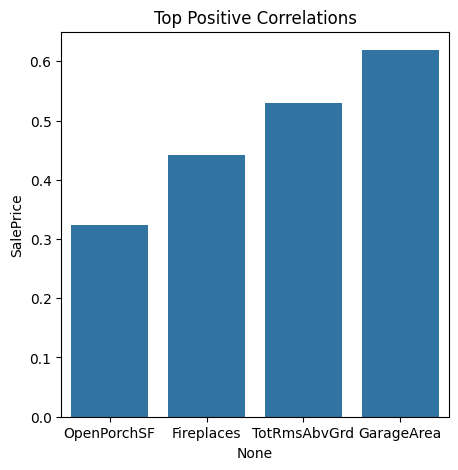

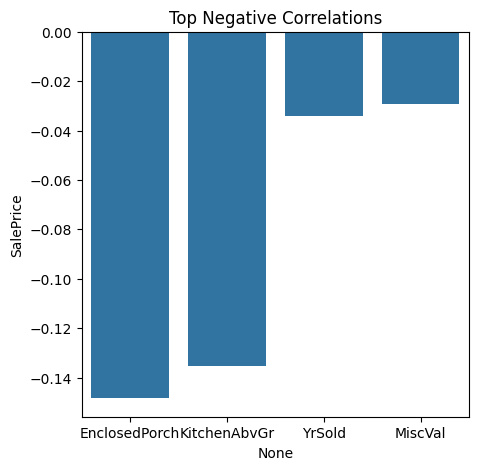

In [37]:
#### Important Correlations with 'Survived'
print("\nImportant correlations with 'Survived':")
corrs = df_train.drop(labels=['GarageCars'], axis=1).corr().sort_values(by=['SalePrice'])['SalePrice'].iloc[:-1]
corrs_max = corrs[-4:]
corrs_min = corrs[:4]
fig, ax = plt.subplots(figsize = (5,5))
sns.barplot(x=corrs_max.index, y = corrs_max)
plt.title("Top Positive Correlations")
fig, ax = plt.subplots(figsize = (5,5))
sns.barplot(x=corrs_min.index, y = corrs_min)
plt.title("Top Negative Correlations")

On voit ques certaines features influes grandement le prix de vente, notamment la taille du garage, ainsi que le nombre de pièces au dessus du sol, de cheminées et de vérandas ouvertes, avec une corrélation de plus de 0,5.

Les variables corrélées négativement le sont cependant avec un score beaucoup plus faible, donc moins représentative d'un quelqconque lien avec le prix de vente final.

## Comparaison avec le test

In [43]:
df_test =  pd.read_csv("module3_exercise_test.csv", sep=",", index_col='id').drop(labels=['GarageCars'], axis=1)

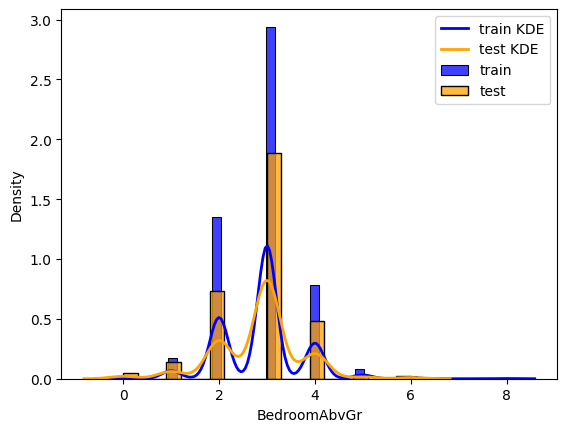

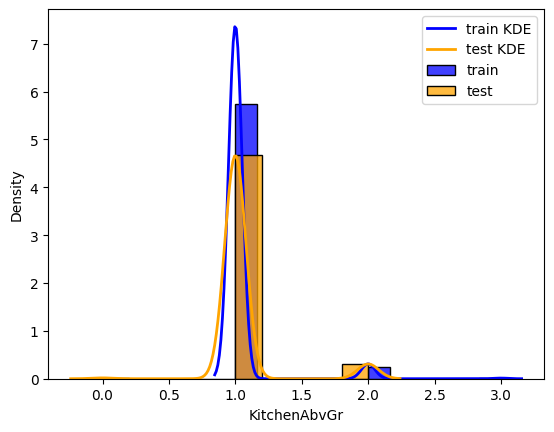

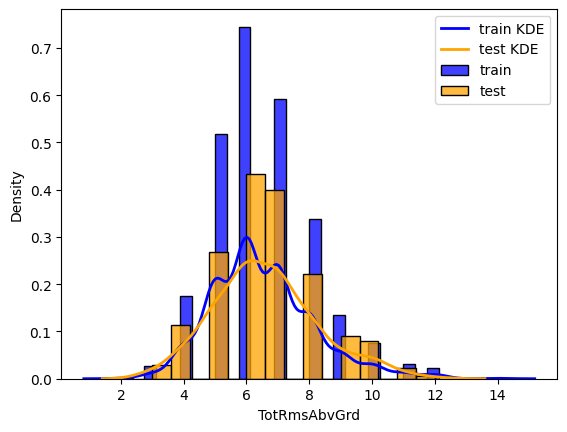

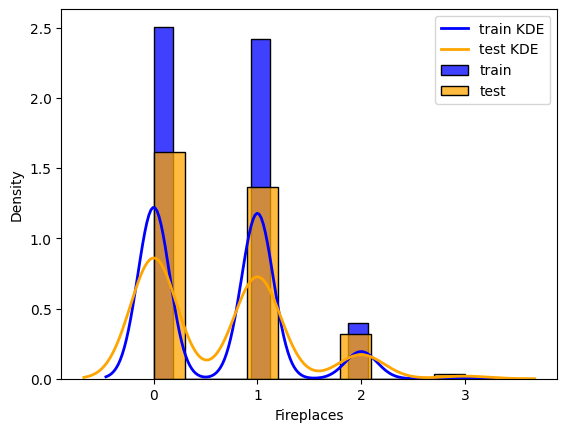

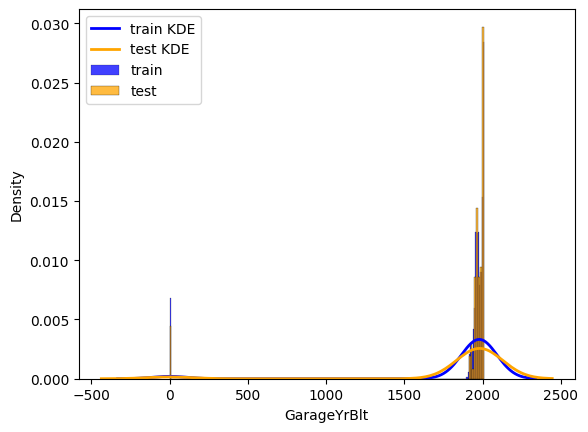

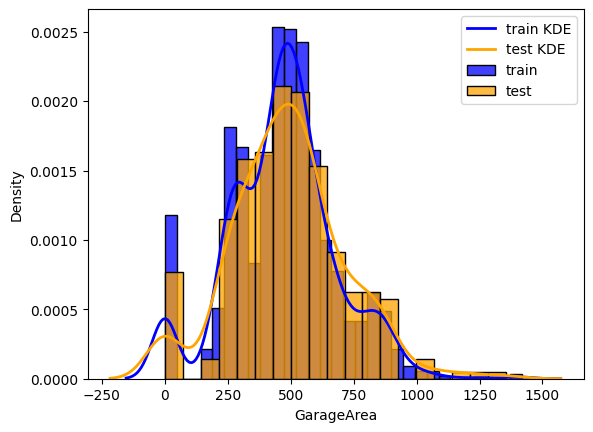

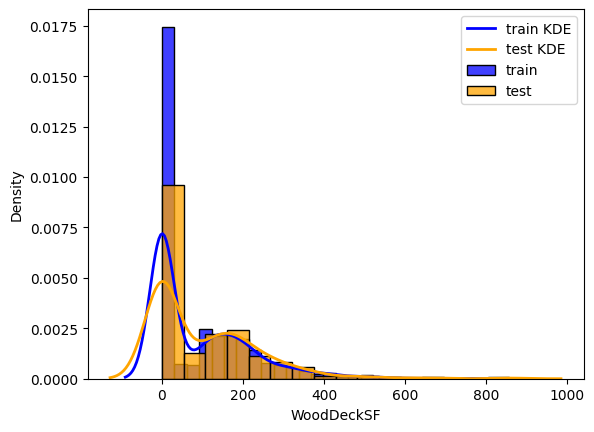

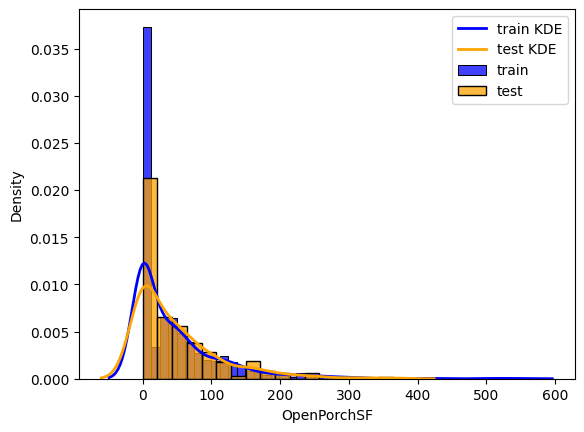

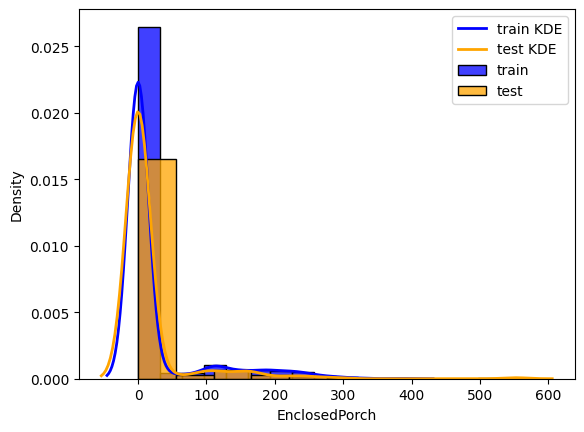

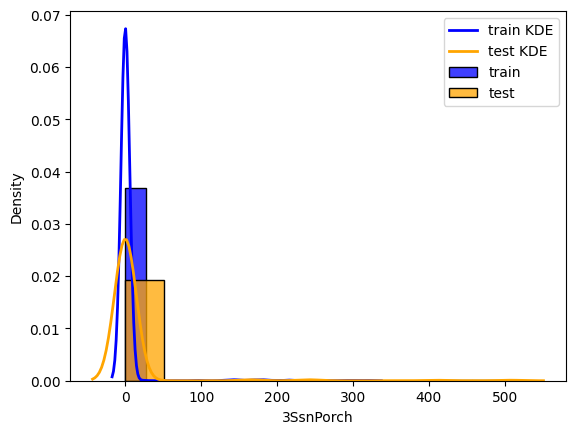

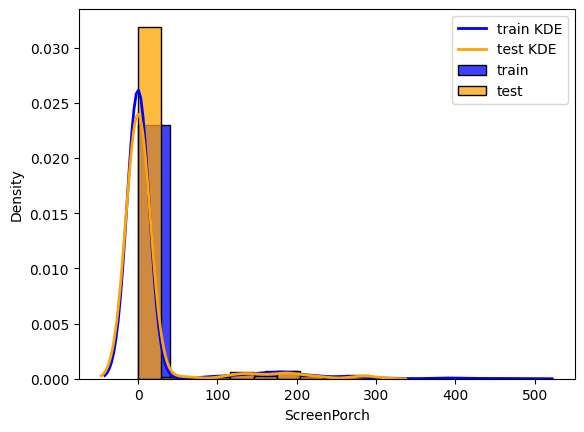

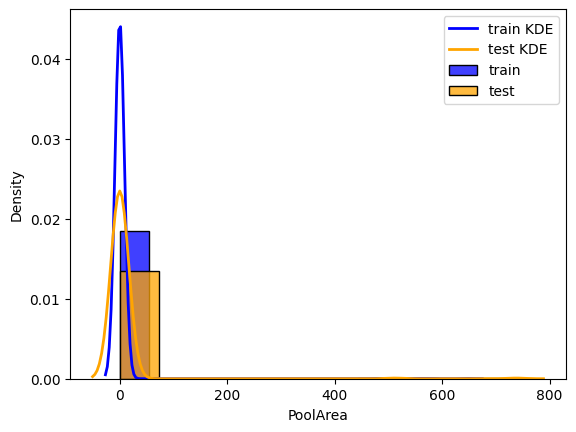

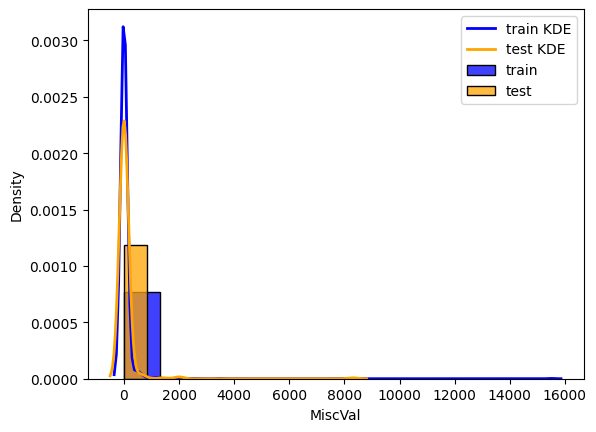

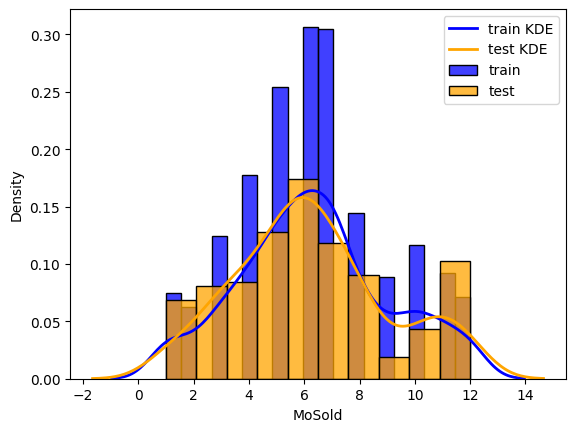

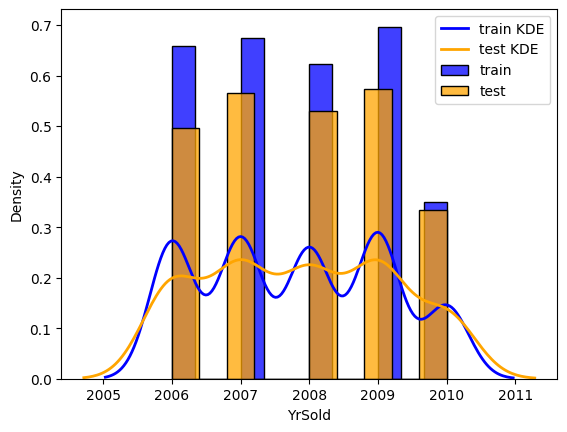

In [44]:
for col in df_test.columns:
    plt.figure()

    # Plot histograms for train and test
    sns.histplot(df_train[col], label='train', color='blue', kde=False, stat='density')
    sns.histplot(df_test[col], label='test', color='orange', kde=False, stat='density')

    # Overlay KDE plots for train and test
    sns.kdeplot(df_train[col], color='blue', label='train KDE', linewidth=2)
    sns.kdeplot(df_test[col], color='orange', label='test KDE', linewidth=2)

    plt.legend()
    plt.show()

Les données du jeux de test semblent suivrent la même répartition que celle du jeu d'entrainement, bien qu'un peu plus étalées